In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.pipeline import Pipeline as ImPipeline
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay, recall_score, accuracy_score, precision_score, f1_score
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from numpy import array 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1, L2
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline

In [3]:
df = pd.read_csv('../data/data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [7]:
df['Bankrupt?'].dtype == 'int64'

True

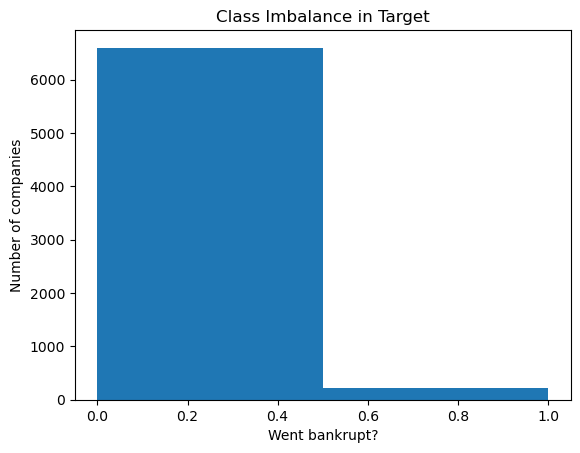

In [12]:
fig, ax = plt.subplots()
ax.hist(df['Bankrupt?'], bins = 2)
ax.set_title('Class Imbalance in Target')
ax.set_xlabel('Went bankrupt?')
ax.set_ylabel('Number of companies')
plt.show()

In [ ]:
df.hist(figsize = (35,30),bins = 30)
plt.show()

In [ ]:
#before making any models I have to do a few things 
#1: get rid of outliars
#2: cut down on the amount of features I have
#3: smote the data so that I have a large enough sample

In [ ]:
#first step

In [ ]:
def remove_outliers(feature,feature_name,data):
    
    q1, q3 = np.percentile(feature, 25), np.percentile(feature, 75)
    iqr = q3 - q1
    print('iqr: {}'.format(iqr))
    
    feat_cut_off = iqr * 1.5
    feat_lower, feat_upper = q1 - feat_cut_off, q3 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))

    data = data.drop(data[(data[feature_name] > feat_upper) | (data[feature_name] < feat_lower)].index)
    print('*' * 80)
    
    return data

for col in df:
    df_no_outliers = remove_outliers(df[col],str(col),df)

In [ ]:
#I want this to fail only uncomment to make sure 
# assert df_no_outliers != df

In [ ]:
df_no_outliers.head()

In [ ]:
df = df_no_outliers

In [ ]:
df.info()

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
X = df.drop(columns = 'Bankrupt?')
y = df['Bankrupt?']

In [ ]:
scaler = StandardScaler()

In [ ]:
def log_trans(data):
    
    for col in data:
        skew = data[col].skew()
        if skew > 0.5 or skew < -0.5:
            data[col] = np.log1p(data[col])
        else:
            continue
            
    return data

X_adjusted = log_trans(X)

In [ ]:
X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(X_adjusted, y, test_size = .3, random_state = 42, stratify = y)

In [ ]:
scaler = StandardScaler()
base_pca = PCA(n_components= 44)
smote = BorderlineSMOTE(k_neighbors = 5, random_state=42)
X_tr_stand = scaler.fit_transform(X_train_pre)
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr_stand, y_train_pre)
X_tr_pca = base_pca.fit_transform(X_tr_smote)
X_test_pca = base_pca.transform(X_test_pre)

In [ ]:
pca_trans_df = pd.DataFrame(X_tr_pca)
pca_trans_df

In [ ]:
pca_df = pd.DataFrame(base_pca.explained_variance_ratio_)
fig, ax = plt.subplots()
ax.hist(pca_df, bins = 20)
ax.set_title('principle components by variance explained')
ax.set_xlabel('% variance explained')
ax.set_ylabel('num of components')
plt.show()

In [ ]:
min_features_to_select = 1 
clf = LogisticRegression(max_iter = 1000)
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="recall",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_adjusted, y)

print(f"Optimal number of features: {rfecv.n_features_}")

In [ ]:
clf = LogisticRegression(max_iter = 10000)
select = RFECV(estimator=clf, cv=5)
select = select.fit(X_adjusted, y)
 
print("Feature ranking: ", select.ranking_)

In [ ]:
mask = select.get_support()
arr = df.to_numpy()
features = array(X_adjusted.columns) 
best_features = features[mask]
 
print("All features: ", X_adjusted.shape[1])
print(features)

print("Selected best: ", best_features.shape[0])
print(features[mask]) 

In [ ]:
feat_to_drop = [feat for feat in features if feat not in features[mask]]

In [ ]:
X_reduced = X_adjusted.drop(columns = feat_to_drop)
X_reduced

In [ ]:
X_reduced.hist(figsize = (35,30),bins = 50)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = .3, random_state = 42, stratify = y)

In [ ]:
X_train

In [ ]:
scaler = StandardScaler()
base_pca = PCA(n_components= 12)
smote = BorderlineSMOTE(k_neighbors = 5, random_state=42)
X_tr_stand = scaler.fit_transform(X_train)
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr_stand, y_train)
X_tr_pca = base_pca.fit_transform(X_tr_smote)
X_test_pca = base_pca.transform(X_test)

base_pca.components_

In [ ]:
pca_trans_df = pd.DataFrame(X_tr_pca)
pca_trans_df

In [ ]:
base_pca.components_[0]

In [ ]:
base_pca.explained_variance_ratio_

In [ ]:
pca_df = pd.DataFrame(base_pca.explained_variance_ratio_)
fig, ax = plt.subplots()
ax.hist(pca_df, bins = 20)
ax.set_title('principle components by variance explained')
ax.set_xlabel('% variance explained')
ax.set_ylabel('num of components')
#pca_df.hist(figsize = (10,8),bins = 25)
plt.show()

In [ ]:
#baseline logreg model
steps = [('scaler', StandardScaler()),
         ('smote', BorderlineSMOTE(k_neighbors = 5, random_state = 42)),
         ('pca', PCA(n_components = 12)),
         ('logreg', LogisticRegression())]
log_pipe = ImPipeline(steps)
params = {'smote__k_neighbors': [3, 5, 10, 15, 20] ,
          'logreg__C': [.001, .01, .1]}
logreg_cv = GridSearchCV(estimator = log_pipe, param_grid = params, cv = 5)

In [ ]:
logreg_cv.fit(X_train, y_train)

In [ ]:
logreg_cv.best_score_

In [ ]:
logreg_cv.best_params_

In [ ]:
log_pipe.fit(X_train, y_train) 

In [ ]:
best_logreg_model = logreg_cv.best_estimator_

In [ ]:
y_rfc_pred = best_logreg_model.predict(X_test)
print(classification_report(y_test, y_rfc_pred))

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_logreg_model, X_test, y_test);

In [ ]:
log_pipe.score(X_train,y_train)

In [ ]:
log_pipe.score(X_test,y_test)

In [ ]:
#looks decent for a baseline PCA logreg model, but def some work to be done, next lets try a random forest

In [ ]:
bag_class_decision = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 150)
steps = [('scaler', StandardScaler()),
         ('smote', BorderlineSMOTE(k_neighbors = 5, random_state = 42)),
         ('pca', PCA(n_components = 12)),
         ('dtc', bag_class_decision)]
rfc_pipe = ImPipeline(steps)
params = {'dtc__base_estimator__max_depth': np.arange(2,6,2)}
rfc_cv = GridSearchCV(scoring = 'recall', estimator = rfc_pipe, param_grid = params, cv = 5)


In [ ]:
rfc_cv.fit(X_train, y_train)

In [ ]:
rfc_cv.best_params_

In [ ]:
rfc_best = rfc_cv.best_estimator_

In [ ]:
rfc_best.fit(X_train, y_train)

In [ ]:
ConfusionMatrixDisplay.from_estimator(rfc_best, X_test, y_test);

In [ ]:
y_rfc_pred = rfc_best.predict(X_test)
print(classification_report(y_test, y_rfc_pred))

In [ ]:
#XG boosting time

In [ ]:
params = {'xgb__max_depth': [3, 4, 5], 'xgb__learning_rate': [.01, .1],
          'xgb__reg_alpha': [0, .25, .5], 'xgb__reg_lambda': [0, .25, .5], 'xgb__n_estimators': [100], 'xgb__colsample_bytree': [.5]}
#cv = GridSearchCV(estimator = XGBClassifier(objective='reg:squarederror'), scoring='recall',
                 # param_grid = params, cv = 5)

In [ ]:
steps = [('smote', BorderlineSMOTE(k_neighbors = 5, random_state = 42)),
         ('pca',  PCA(n_components = 12)),
         ('xgb', XGBClassifier('reg:squarederror'))]
xgb_pipe = ImPipeline(steps)
xgb_cv = GridSearchCV(estimator = xgb_pipe, scoring = 'recall', param_grid = params, cv = 5)

In [ ]:
xgb_cv.fit(X_train, y_train)

In [ ]:
xgb_cv.best_params_

In [ ]:
xgb_best = xgb_cv.best_estimator_

In [ ]:
xgb_best.fit(X_train, y_train)

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb_best, X_test, y_test);

In [ ]:
y_xgb_pred = xgb_best.predict(X_test)
print(classification_report(y_test, y_xgb_pred))

In [ ]:
#finally lets try a neural network

In [ ]:
def create_nn():
    nn_model = Sequential()
    nn_model.add(Dense(8472, input_dim=12, activation='relu', kernel_regularizer = L2(.01)))
    nn_model.add(Dense(20, activation='relu', kernel_regularizer = L1(.005)))
    nn_model.add(Dense(10, activation='relu', kernel_regularizer = L1(.005)))
    nn_model.add(Dense(10, activation='relu', kernel_regularizer = L1(.005)))
    nn_model.add(Dense(units=1, activation='sigmoid'))
    opt = Adam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999)
    nn_model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy', 'AUC'])
    return nn_model
nn_class = KerasClassifier(build_fn = create_nn, epochs = 100, batch_size = 32, verbose = 1)

In [ ]:
steps = [('scaler', StandardScaler()),
         ('smote', BorderlineSMOTE(k_neighbors = 5, random_state = 42)),
         ('pca', PCA(n_components = 12)),
         ('nn', nn_class)]
nn_pipe = ImPipeline(steps)


In [ ]:
nn_pipe.fit(X_train, y_train)

In [ ]:
y_proba = nn_pipe.predict(X_test)

In [ ]:
y_pred = (y_proba > 0.5).astype('int')

In [ ]:
y_nn_pred = nn_pipe.predict(X_test)
print(classification_report(y_test, y_nn_pred))